In [0]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [168]:
df = sio.loadmat('/movie_data-1.mat')
df

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 15 13:54:57 2013',
 '__version__': '1.0',
 'test': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 5, 0, ..., 0, 0, 0]], dtype=uint8),
 'train': array([[5, 3, 4, ..., 0, 0, 0],
        [4, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [5, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [0]:
Y_train = df['train']
Y_test = df['test']

In [170]:
print("Shape of training matrix : ", Y_train.shape)
print()
print("Shape of testing matrix : ", Y_test.shape)

Shape of training matrix :  (943, 1682)

Shape of testing matrix :  (943, 1682)


In [0]:
def recommender(rateMatrix, lowRank,testMatrix,e = 0.01, max_iter = 500, lambda_ = 0.1, mu = 0.0001):

  """ Args:
          - rateMatrix = Input matrix with shape of (m x n ). m is number of users, n is number of movies
          - lowRank = Approximate rank of matrix U-user and V-movie
          -testMatrix = Test matrix with shape of (m x n)
          - e: stopping criterior
          - lambda_ : lasso coefficient for regularization
          - mu : learning rate"""
  ##Initializing 
  r = lowRank
  M = np.tanh(rateMatrix)
  M_test = np.tanh(testMatrix)
  U = np.random.uniform(low = -1, high =1, size=(943,r))
  V = np.random.uniform(low=-1, high =1, size =(r,1682))
  train_error = []
  test_error  = []

  for it in range(0,max_iter):
#Updating U
    U =  U - mu * 2 * (-np.dot((M - np.dot(U,V)), V.T) + np.linalg.norm(U))
    U = np.tanh(U)
#Updating V
    V =  V - mu * 2 * (-np.dot((M - np.dot(U,V)).T,U).T + np.linalg.norm(V))
    V = np.tanh(V)
#RMSE calculation
    error = np.linalg.norm((M - np.dot(U,V)))/M.shape[0]
    train_error.append(error)

    test_er = np.linalg.norm((M_test -np.dot(U,V)))/M_test.shape[0]
#Stopping criteria
    if len(train_error) > 100 and (err[it] - err[(it-1)]) <e and (err[(it-1)] -err[(it-10)]) < e:
      break
##Plotting training_RMSE
  plt.plot(train_error)
  plt.xlabel('Iterations')
  plt.ylabel('RMSE')
  plt.title("RMSE for training with lowRank = {}".format(lowRank))
  plt.show() 

  return U,V, train_error, test_er


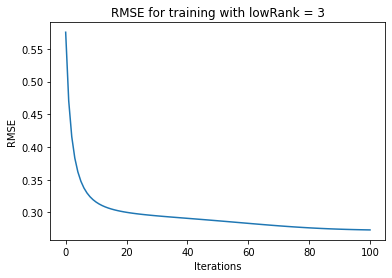

In [213]:
#test function 'recommender' with rank =3
U,V, train_error, test_error = recommender(Y_train, 3, Y_test)

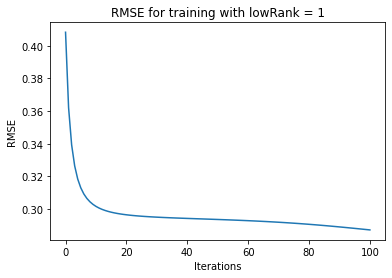

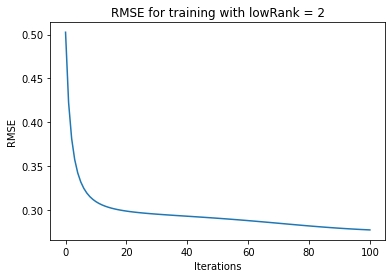

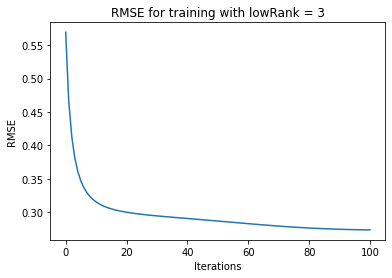

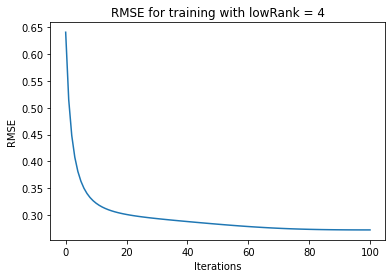

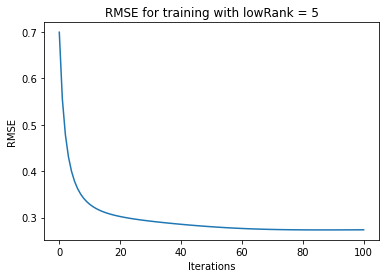

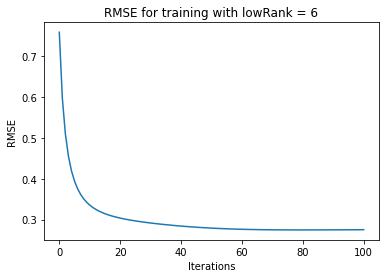

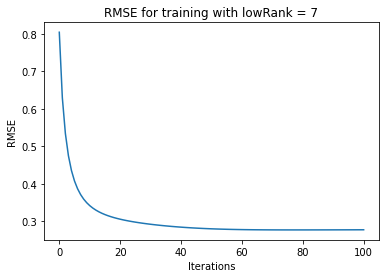

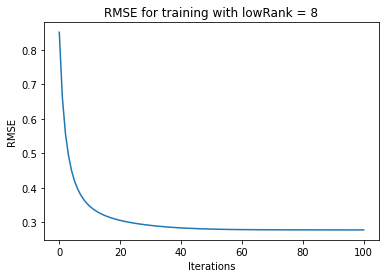

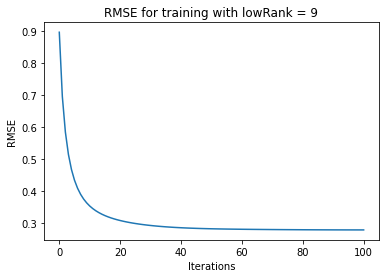

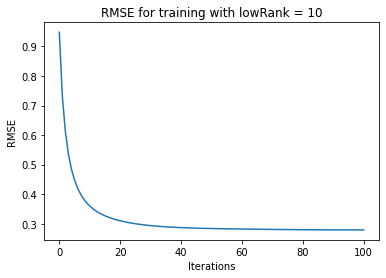

In [214]:
ranks = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10]
train_multiple = []
test_multiple = []
for rank in ranks:
  U,V, train_error, test_error = recommender(Y_train, rank, Y_test)
  train_multiple.append(train_error)
  test_multiple.append(test_error)


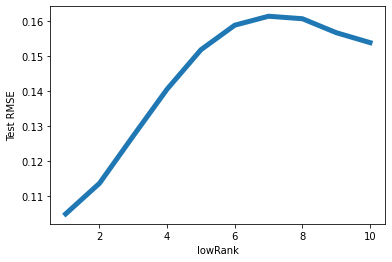

In [216]:
plt.plot(ranks, test_multiple, linewidth =5)
plt.xlabel("lowRank")
plt.ylabel("Test RMSE")
plt.show()

In [0]:
train = []
for i in train_multiple:
  train.append(i[-1])

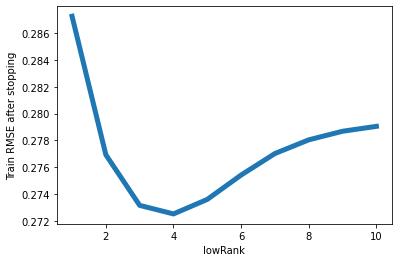

In [223]:
plt.plot(ranks, train, linewidth =5)
plt.xlabel("lowRank")
plt.ylabel("Train RMSE after stopping")
plt.show()

In [224]:
"""
- As lowRank increases from 1 to 10, training RMSE decreases up to lowRank = 4 then starts increasing.
- As lowRank increases from 1 to 10, testing RMSE increases up to lowRank = 7 then starts decreasing.
- As observed, the training RMSE is always higher than the testing RMSE, probably suggest that we undertrained our dataset( model can be retrained with lower learning rate and/or lower lasso coefficient"""

'\n- As lowRank increases from 1 to 10, training RMSE decreases up to lowRank = 4 then starts increasing.\n- As lowRank increases from 1 to 10, testing RMSE increases up to lowRank = 7 then starts decreasing.\n- As observed, the training RMSE is always higher than the testing RMSE, probably suggest that we undertrained our dataset( model can be retrained with lower learning rate and/or lower lasso coefficient'

In [0]:
"""Deciding hyperparameters:
- For lambda( lasso regularization coeffiencient), started with 1 and compare training RMSE and testing RMSE. If training RMSE is significantly larger than testing RMSE, 
\we undertrained the model,and lambda should be decreased until training RMSE balances testing RMSE. And vice versa, if training RMSE < testing RMSE, overfit -> increase lambda"""
"""
- For learning rate miu, start with miu = 1e-2, then observe training error and decrease miu with factor of 5 until  training RMSE is  stable and converged""